In [2]:
import pandas as pd

# Load the uploaded CSV file to inspect its structure and contents
file_path = r"C:\Users\adity\OneDrive\Desktop\Unemployment_analysis\Unemployment in India- cleaned data.csv"
data = pd.read_csv(file_path)

# Display basic information and the first few rows of the dataset
data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    int64  
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 40.6+ KB


(None,
            Region        Date Frequency  Estimated Unemployment Rate (%)  \
 0  Andhra Pradesh  31-05-2019   Monthly                             3.65   
 1  Andhra Pradesh  30-06-2019   Monthly                             3.05   
 2  Andhra Pradesh  31-07-2019   Monthly                             3.75   
 3  Andhra Pradesh  31-08-2019   Monthly                             3.32   
 4  Andhra Pradesh  30-09-2019   Monthly                             5.17   
 
    Estimated Employed  Estimated Labour Participation Rate (%)   Area  
 0            11999139                                    43.24  Rural  
 1            11755881                                    42.05  Rural  
 2            12086707                                    43.50  Rural  
 3            12285693                                    43.97  Rural  
 4            12256762                                    44.68  Rural  )

In [3]:
# Convert the 'Date' column to datetime format and check for missing values
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Display the first few rows of the dataset after conversion and missing value check
data_head_after_conversion = data.head()

missing_values, data_head_after_conversion


(Region                                     0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
 Area                                       0
 dtype: int64,
            Region       Date Frequency  Estimated Unemployment Rate (%)  \
 0  Andhra Pradesh 2019-05-31   Monthly                             3.65   
 1  Andhra Pradesh 2019-06-30   Monthly                             3.05   
 2  Andhra Pradesh 2019-07-31   Monthly                             3.75   
 3  Andhra Pradesh 2019-08-31   Monthly                             3.32   
 4  Andhra Pradesh 2019-09-30   Monthly                             5.17   
 
    Estimated Employed  Estimated Labour Participation Rate (%)   Area  
 0            11999139                                    43.24  Rural  
 1            11755881                                    4

C:\Users\adity\AppData\Local\Temp\ipykernel_61832\510517432.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=data, ci=None, marker="o", color='blue')


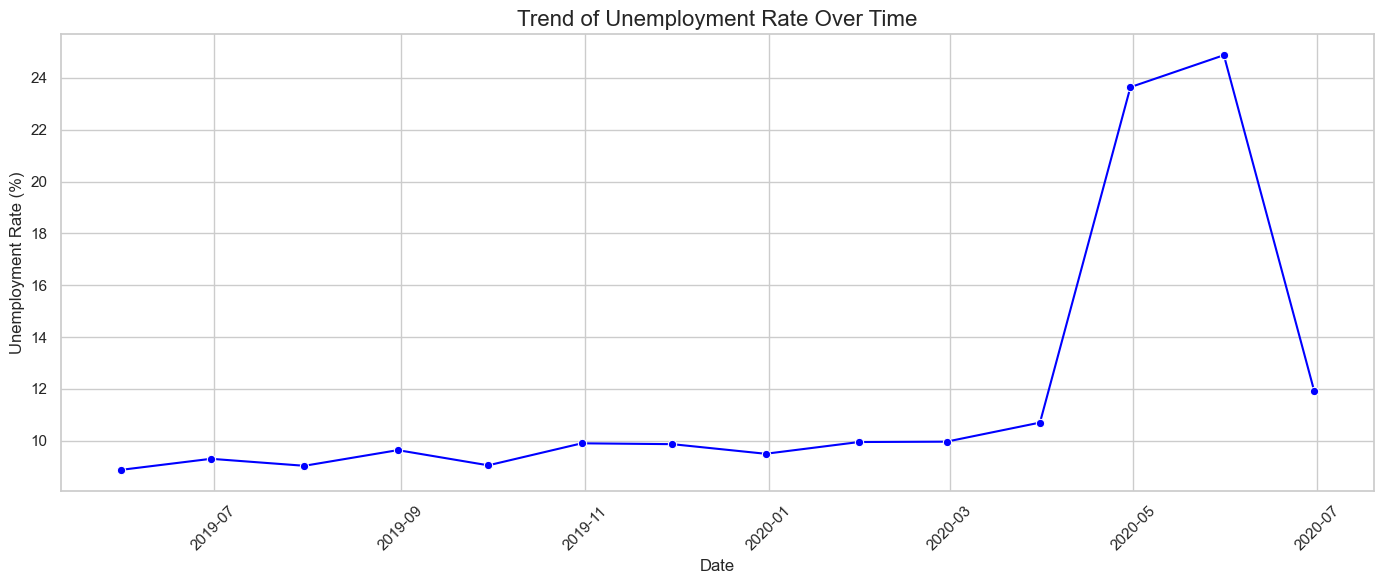

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Plot the overall trend of unemployment rates over time
plt.figure(figsize=(14, 6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=data, ci=None, marker="o", color='blue')
plt.title('Trend of Unemployment Rate Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#This code will give a warning. The warning message indicates that the ci parameter is deprecated in newer versions of Seaborn. Instead, we should use errorbar=None to achieve the same effect.

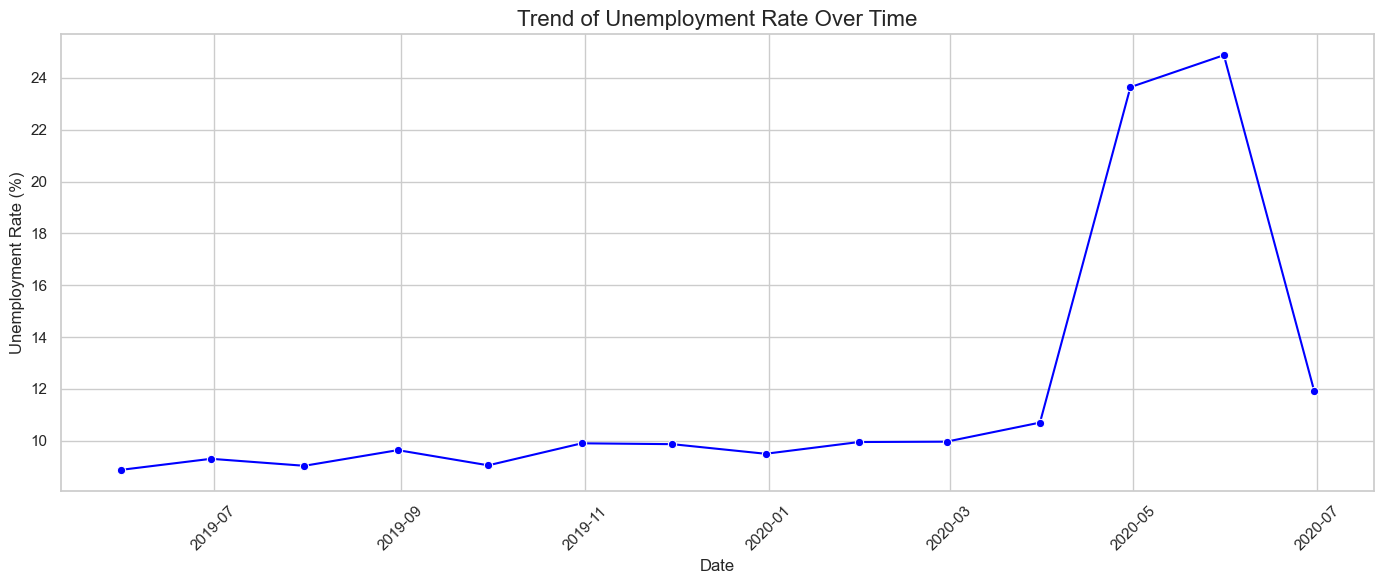

In [5]:

# Update the plot to remove the warning about the deprecated `ci` parameter
plt.figure(figsize=(14, 6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=data, errorbar=None, marker="o", color='blue')
plt.title('Trend of Unemployment Rate Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


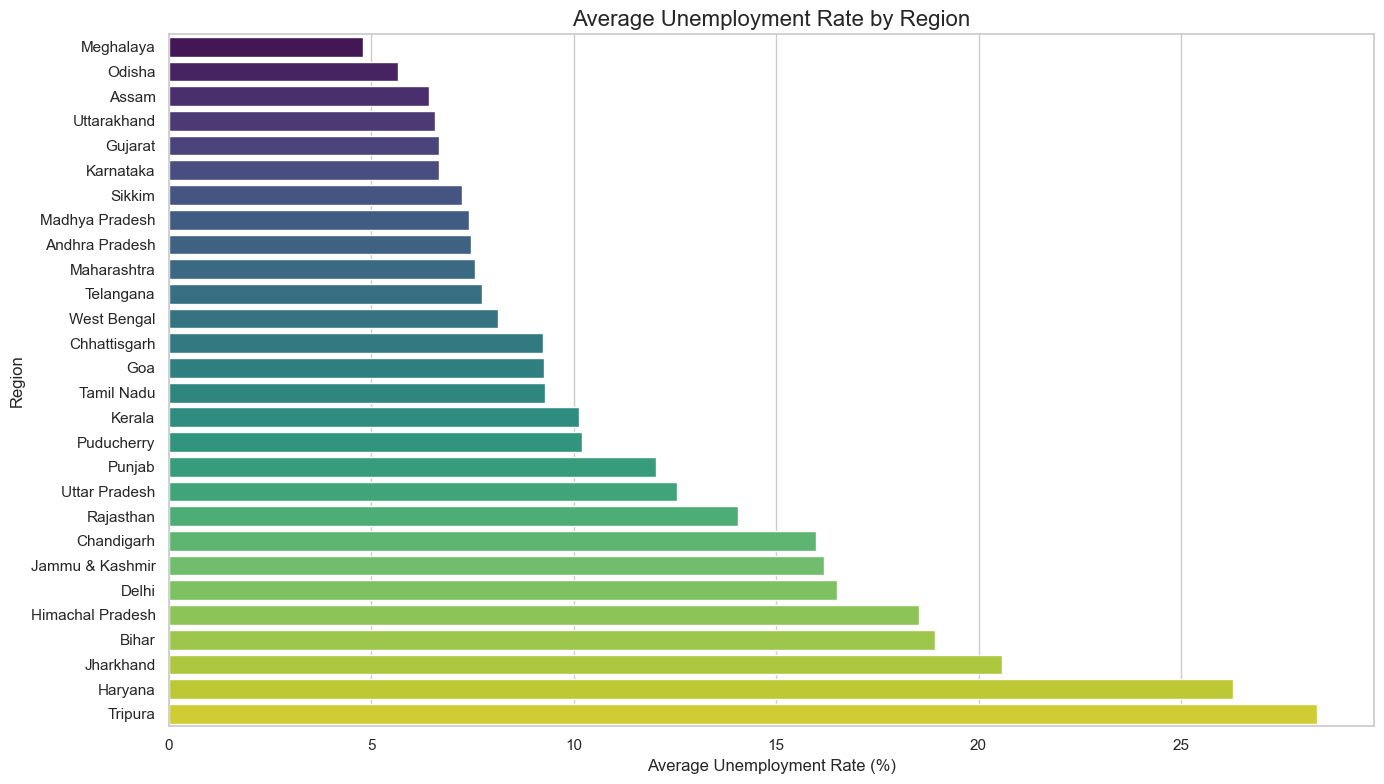

In [7]:
# Calculate average unemployment rate by region
region_avg_unemployment = data.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values()

# Plot the average unemployment rate by region with updated palette usage
plt.figure(figsize=(14, 8))
sns.barplot(x=region_avg_unemployment, y=region_avg_unemployment.index, hue=region_avg_unemployment.index, palette="viridis", dodge=False, legend=False)
plt.title('Average Unemployment Rate by Region', fontsize=16)
plt.xlabel('Average Unemployment Rate (%)', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.tight_layout()
plt.show()


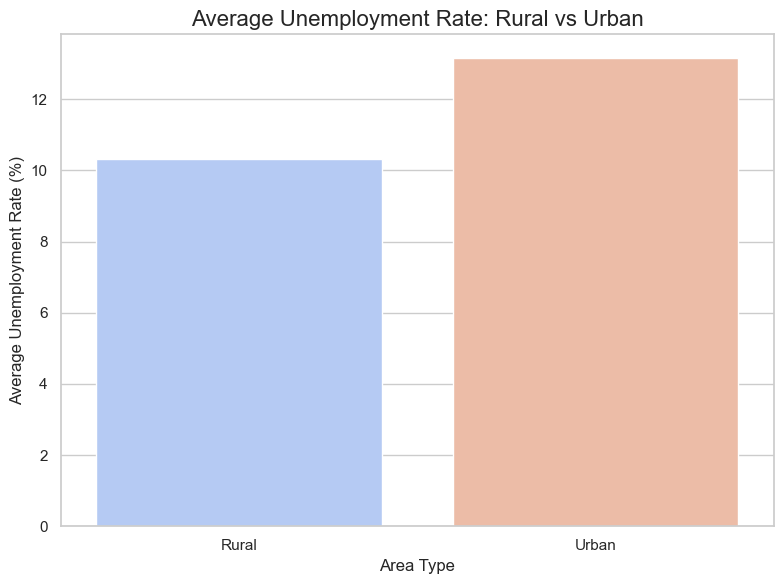

In [9]:
# Calculate average unemployment rate by area type (Rural/Urban)
area_avg_unemployment = data.groupby('Area')['Estimated Unemployment Rate (%)'].mean()

# code for Rural vs. Urban unemployment rate visualization
plt.figure(figsize=(8, 6))
sns.barplot(
    x=area_avg_unemployment.index,
    y=area_avg_unemployment.values,
    hue=area_avg_unemployment.index,
    palette="coolwarm",
    dodge=False,
    legend=False
)
plt.title('Average Unemployment Rate: Rural vs Urban', fontsize=16)
plt.xlabel('Area Type', fontsize=12)
plt.ylabel('Average Unemployment Rate (%)', fontsize=12)
plt.tight_layout()
plt.show()



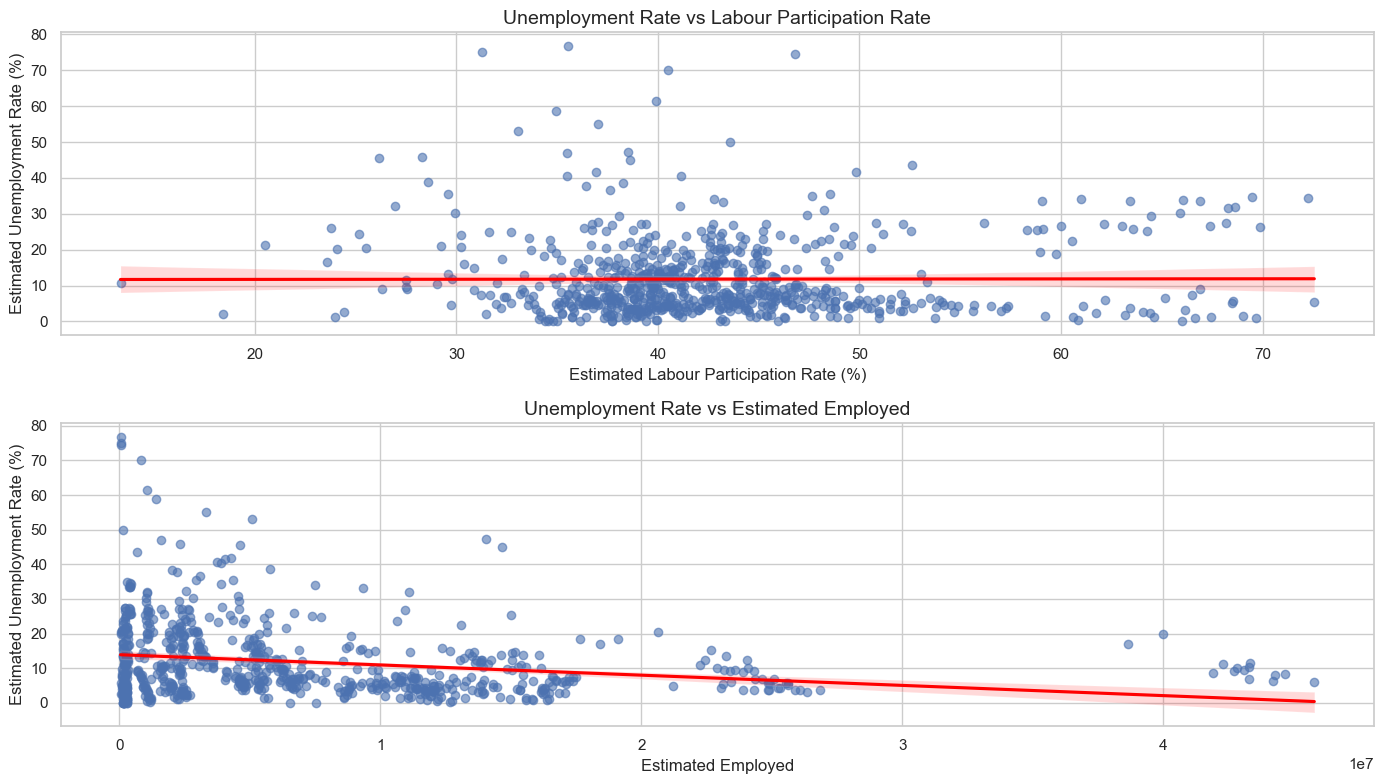

In [11]:
# Scatterplot with regression line for key variable pairs
plt.figure(figsize=(14, 8))

# Unemployment Rate vs. Labour Participation Rate
plt.subplot(2, 1, 1)
sns.regplot(
    x='Estimated Labour Participation Rate (%)',
    y='Estimated Unemployment Rate (%)',
    data=numerical_data,
    scatter_kws={'alpha':0.6},
    line_kws={'color':'red'}
)
plt.title('Unemployment Rate vs Labour Participation Rate', fontsize=14)

# Unemployment Rate vs. Estimated Employed
plt.subplot(2, 1, 2)
sns.regplot(
    x='Estimated Employed',
    y='Estimated Unemployment Rate (%)',
    data=numerical_data,
    scatter_kws={'alpha':0.6},
    line_kws={'color':'red'}
)
plt.title('Unemployment Rate vs Estimated Employed', fontsize=14)

plt.tight_layout()
plt.show()


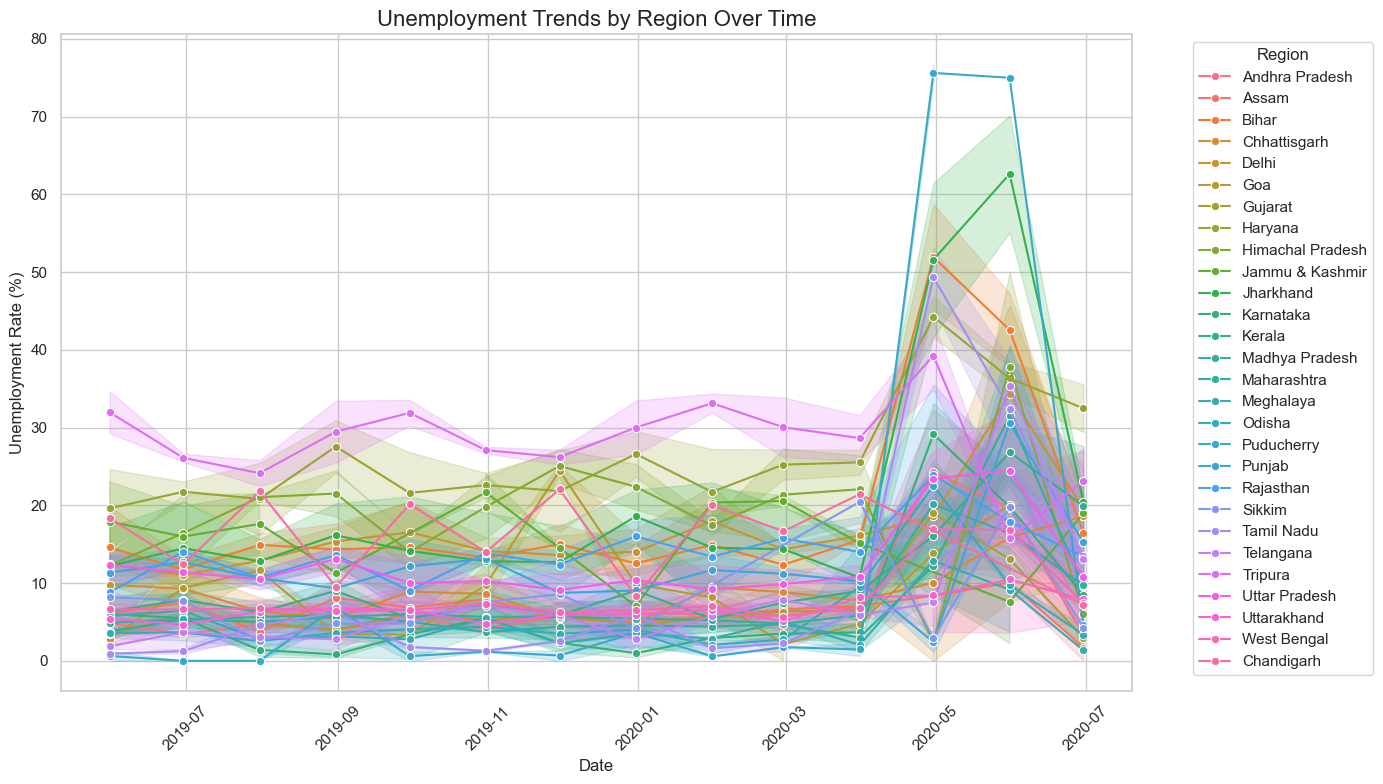

In [15]:
# Line plot to show unemployment trends by region
plt.figure(figsize=(14, 8))
sns.lineplot(
    x='Date', 
    y='Estimated Unemployment Rate (%)', 
    hue='Region', 
    data=data, 
    marker='o'
)
plt.title('Unemployment Trends by Region Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [16]:
# Find the peak unemployment rate for each region
peak_unemployment = data.loc[data.groupby('Region')['Estimated Unemployment Rate (%)'].idxmax()]
print(peak_unemployment[['Region', 'Date', 'Estimated Unemployment Rate (%)']])


               Region       Date  Estimated Unemployment Rate (%)
370    Andhra Pradesh 2020-04-30                            32.30
378             Assam 2019-10-31                            11.17
398             Bihar 2020-04-30                            58.77
407        Chandigarh 2019-11-30                            22.05
426      Chhattisgarh 2020-06-30                            27.07
439             Delhi 2020-05-31                            45.78
447               Goa 2019-11-30                            25.20
464           Gujarat 2020-04-30                            25.94
478           Haryana 2020-04-30                            46.89
493  Himachal Pradesh 2020-05-31                            50.00
498   Jammu & Kashmir 2019-10-31                            24.06
517         Jharkhand 2020-05-31                            70.17
158         Karnataka 2020-04-30                            33.17
545            Kerala 2020-05-31                            30.28
559    Mad

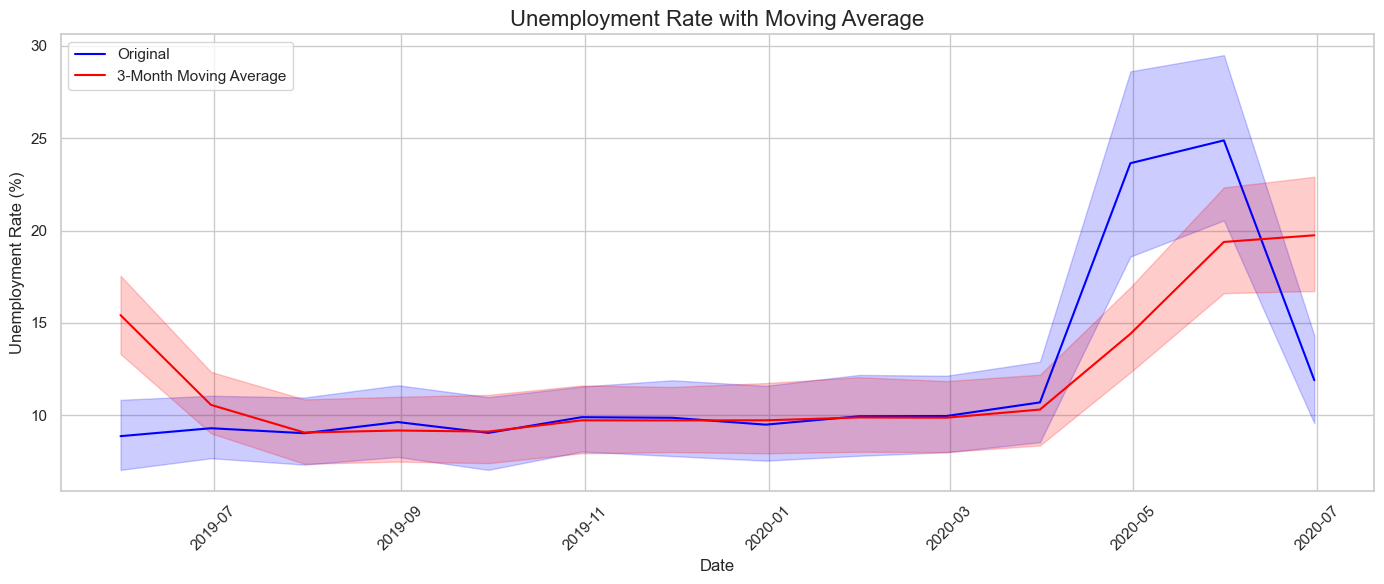

In [17]:
# Calculate a 3-month moving average for unemployment rate
data['Moving Average'] = data['Estimated Unemployment Rate (%)'].rolling(window=3).mean()

# Plot the moving average along with original data
plt.figure(figsize=(14, 6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=data, label='Original', color='blue')
sns.lineplot(x='Date', y='Moving Average', data=data, label='3-Month Moving Average', color='red')
plt.title('Unemployment Rate with Moving Average', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


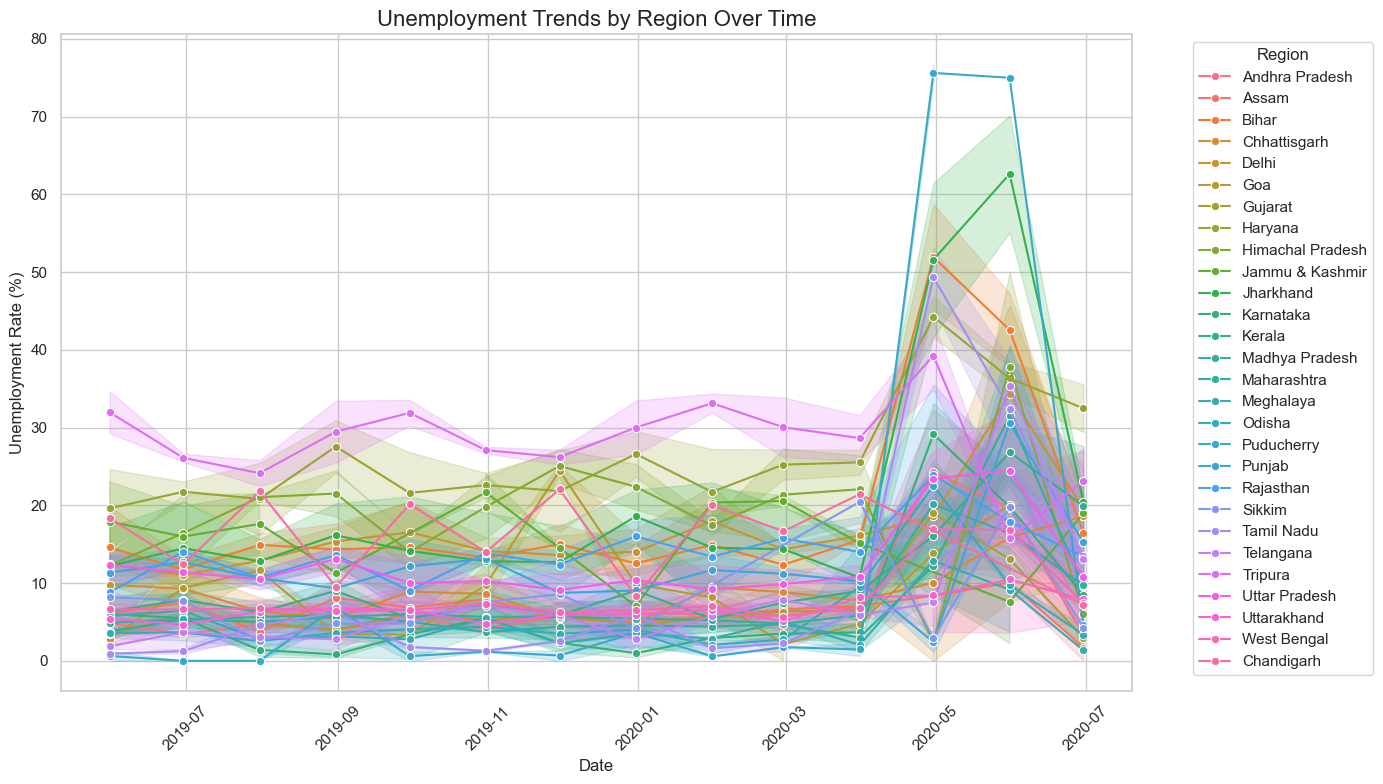

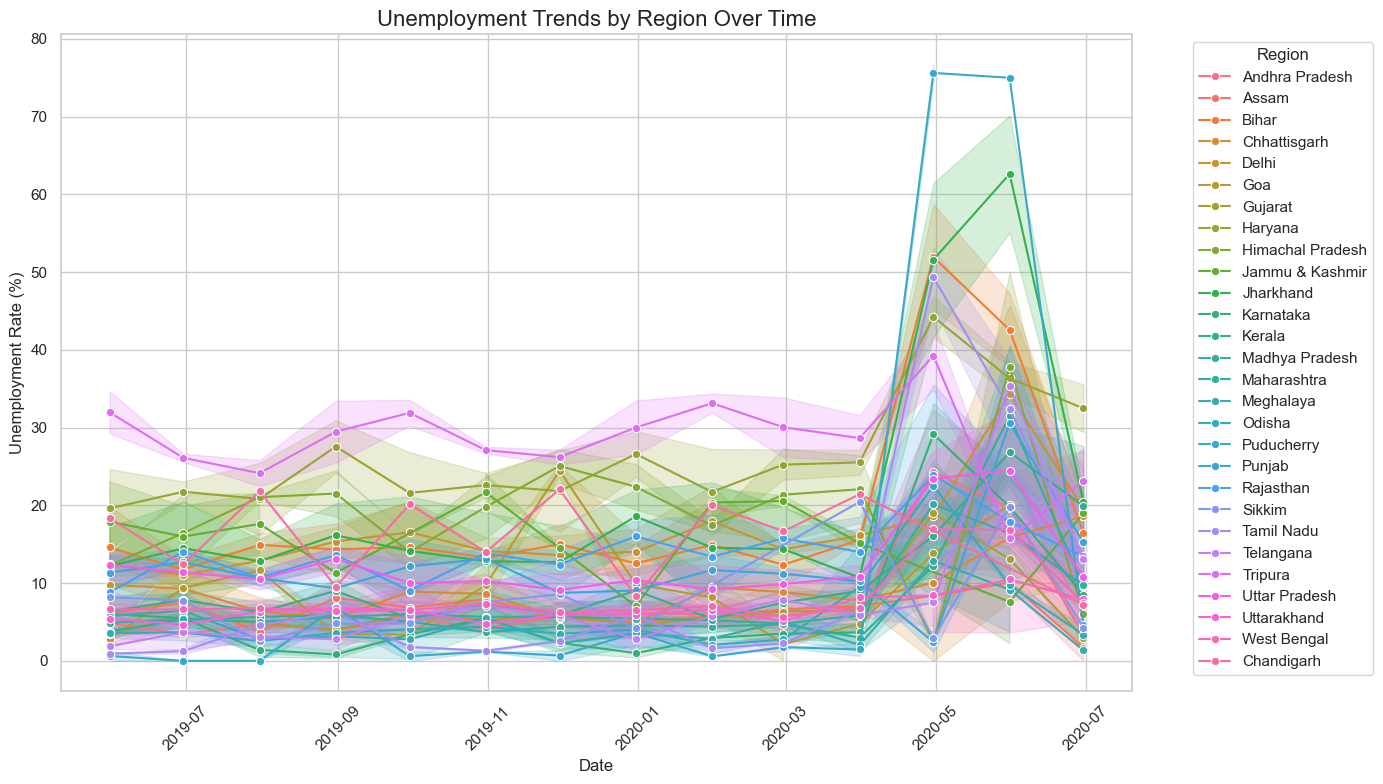